In [155]:
import pandas as pd
import numpy as np

In [157]:
# open file and store in dataframe
df = pd.read_csv('../match-data/nwsl-events/2025-05-17_North_Carolina_Courage__vs__Chicago_Stars.csv')

In [159]:
df.head()

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier,playerId,playerName,keyPass,assist,Squad,Position
0,2816023059,1,34,16,0,0,dzxypx8djih58p668surbi4qm,1,0.0,0.0,2025-05-17T20:15:58.696Z,2025-05-17T21:07:49Z,"[{'id': 5734201591, 'qualifierId': 227, 'value...",NaN,NaN,NaN,NaN,Chicago Stars,Away
1,2816024921,1,34,16,0,0,b4fbmos00gxtk8qnaqsm392p5,1,0.0,0.0,2025-05-17T20:18:24.557Z,2025-05-17T21:06:52Z,"[{'id': 5734212687, 'qualifierId': 227, 'value...",NaN,NaN,NaN,NaN,North Carolina Courage,Home
2,2816062723,2,32,1,0,0,dzxypx8djih58p668surbi4qm,1,0.0,0.0,2025-05-17T21:09:26.947Z,2025-05-17T21:09:29Z,"[{'id': 5734424877, 'qualifierId': 127, 'value...",NaN,NaN,NaN,NaN,Chicago Stars,Away
3,2816062713,2,32,1,0,0,b4fbmos00gxtk8qnaqsm392p5,1,0.0,0.0,2025-05-17T21:09:26.947Z,2025-05-17T21:09:27Z,"[{'id': 5734424853, 'qualifierId': 127, 'value...",NaN,NaN,NaN,NaN,North Carolina Courage,Home
4,2816062727,3,1,1,0,0,dzxypx8djih58p668surbi4qm,1,49.9,50.0,2025-05-17T21:09:26.948Z,2025-05-17T21:09:31Z,"[{'id': 5734424907, 'qualifierId': 212, 'value...",6e7scc2z7henelebs853mc844,A. Schlegel,NaN,NaN,Chicago Stars,Away


In [161]:
df.columns

Index(['id', 'eventId', 'typeId', 'periodId', 'timeMin', 'timeSec',
       'contestantId', 'outcome', 'x', 'y', 'timeStamp', 'lastModified',
       'qualifier', 'playerId', 'playerName', 'keyPass', 'assist', 'Squad',
       'Position'],
      dtype='object')

In [163]:
sample_row = df[df['qualifier'].str.contains('195', na=False)].iloc[0]
print(sample_row['qualifier'])

[{'id': 5734443195, 'qualifierId': 144, 'value': '5'}, {'id': 5734442899, 'qualifierId': 347, 'value': '0'}, {'id': 5734442897, 'qualifierId': 56, 'value': 'Back'}]


In [165]:
pass_df = df[df.typeId == 1]

In [167]:
# for i, row in df.iterrows():
#     qualifier_str = row['qualifier']
#     if pd.notna(qualifier_str):
#         # Extract all qualifierId-value pairs using string operations
#         parts = qualifier_str.split("{'id':")  # Split into individual qualifiers
#         for part in parts[1:]:  # Skip the first empty split
#             if "'qualifierId': 140" in part:
#                 value = part.split("'value': '")[1].split("'")[0]
#                 df.at[i, 'endX'] = float(value)
#             elif "'qualifierId': 141" in part:
#                 value = part.split("'value': '")[1].split("'")[0]
#                 df.at[i, 'endY'] = float(value)

# for i in range(len(df)):
#     df1 = df.iloc[i:i+1,:]
#     j = 0
#     for j in range(len(type_cols)):
#         col = df1[type_cols[j]].values[0]
#         if col == 140:
#             endx = df1.loc[:,'qualifier/%i/value' %j].values[0]
#             df['endX'][i] = endx
#         else:
#             j +=1
#     k = 0
#     for k in range(len(type_cols)):
#         col = df1[type_cols[k]].values[0]
#         if col == 141:
#             endy = df1.loc[:,'qualifier/%i/value' %k].values[0]
#             df['endY'][i] = endy
#         else:
#             k +=1

# unpack the qualifiers
#type_cols = [col for col in df.columns if '/qualifierId' in col]
# get pass locations and receipient
pass_df['passEndX'] = 0.0
pass_df['passEndY'] = 0.0
for i, row in pass_df.iterrows():
    qualifier_str = row['qualifier']
    if pd.notna(qualifier_str):
        qualifiers = json.loads(qualifier_str.replace("'", '"'))  # Fix quotes for JSON
        for q in qualifiers:
            if q.get('qualifierId') == 140:
                pass_df.at[i, 'passEndX'] = float(q['value'])
            elif q.get('qualifierId') == 141:
                pass_df.at[i, 'passEndY'] = float(q['value'])

# get pass length and angle
pass_df['pass_angle'] = 0.0
pass_df['pass_length'] = 0.0
for i, row in pass_df.iterrows():
    qualifier_str = row['qualifier']
    if pd.notna(qualifier_str):
        qualifiers = json.loads(qualifier_str.replace("'", '"'))  # Fix quotes for JSON
        for q in qualifiers:
            if q.get('qualifierId') == 212:
                pass_df.at[i, 'pass_length'] = float(q['value'])
            elif q.get('qualifierId') == 213:
                pass_df.at[i, 'pass_angle'] = float(q['value'])

# get cutbacks (195) and crosses (2)
pass_df['cutback'] = False
pass_df['cross'] = False
for i, row in pass_df.iterrows():
    qualifier_str = row['qualifier']
    if pd.notna(qualifier_str):
        qualifiers = json.loads(qualifier_str.replace("'", '"'))  # Fix quotes for JSON
        for q in qualifiers:
            if q.get('qualifierId') == 195: 
                pass_df.at[i, 'cutback'] = True
            elif q.get('qualifierId') == 2:
                pass_df.at[i, 'cross'] = True

# get switch of play - 196
pass_df['switch_ball'] = False
for i, row in pass_df.iterrows():
    qualifier_str = row['qualifier']
    if pd.notna(qualifier_str):
        qualifiers = json.loads(qualifier_str.replace("'", '"'))  # Fix quotes for JSON
        for q in qualifiers:
            if q.get('qualifierId') == 196: 
                pass_df.at[i, 'switch_ball'] = True

# calculate progressive passes
# df['x'] = df['x']*1.2
# df['y'] = df['y']*0.8
# df['passEndX'] = df['passEndX']*1.2
# df['passEndY'] = df['passEndY']*0.8

# df['beginning'] = np.sqrt(np.square(120 - df['x']) + np.square(40 - df['y']))
# df['end'] = np.sqrt(np.square(120 - df['passEndX']) + np.square(40 - df['passEndY']))

# df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

pass_df['beginning'] = np.sqrt((105 - pass_df['x'])**2 + (52.5 - pass_df['y'])**2)
pass_df['end'] = np.sqrt((105 - pass_df['passEndX'])**2 + (52.5 - pass_df['passEndY'])**2)

pass_df['progressive'] = (
    (pass_df['end'] < pass_df['beginning'] * 0.75) &  # reduced distance by at least 25%
    (pass_df['passEndX'] > pass_df['x']) &  # forward pass
    (pass_df['typeId'] == 1) &  # assuming there's a 'type' or 'eventName' column
    (pass_df['outcome'] == 1)  # if your data marks successful passes
)

# calculate final third passes
pass_df['final_third'] = (pass_df['passEndX'] >= 66.7) & (pass_df['x'] < 66.7)

# get pass receiver
pass_df['pass_receiver'] = None
for i in range(len(pass_df) - 1):
    if pass_df.iloc[i]['typeId'] == 1:
        team = pass_df.iloc[i]['Squad'] == pass_df.iloc[i + 1]['Squad']
        if team:
            pass_df.at[df.index[i], 'pass_receiver'] = pass_df.iloc[i + 1]['playerName']

C:\Users\fredd\AppData\Local\Temp\ipykernel_6212\4216147609.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_df['passEndX'] = 0.0
C:\Users\fredd\AppData\Local\Temp\ipykernel_6212\4216147609.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_df['passEndY'] = 0.0
C:\Users\fredd\AppData\Local\Temp\ipykernel_6212\4216147609.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [168]:
pass_df.drop(columns=['timeStamp', 'lastModified', 'contestantId', 'playerId', 'id'])

,eventId,typeId,periodId,timeMin,timeSec,outcome,x,y,qualifier,playerName,...,pass_angle,pass_length,cutback,cross,switch_ball,beginning,end,progressive,final_third,pass_receiver
4,3.0,1.0,1.0,0.0,0.0,1.0,49.9,50.0,"[{'id': 5734424907, 'qualifierId': 212, 'value...",A. Schlegel,...,2.73,24.1,False,False,False,55.156686,77.009415,False,False,None
5,4.0,1.0,1.0,0.0,4.0,1.0,28.7,65.2,"[{'id': 5734425079, 'qualifierId': 212, 'value...",S. Staab,...,0.64,19.2,False,False,False,77.349725,68.432814,False,False,J. Shaw
6,5.0,1.0,1.0,0.0,6.0,1.0,43.1,83.2,"[{'id': 5734425181, 'qualifierId': 213, 'value...",T. Malham,...,3.92,19.5,False,False,False,69.094862,75.943400,False,False,None
7,6.0,1.0,1.0,0.0,9.0,1.0,29.8,63.1,"[{'id': 5734425239, 'qualifierId': 141, 'value...",S. Staab,...,4.71,19.0,False,False,False,75.943400,77.164305,False,False,J. Grosso
8,7.0,1.0,1.0,0.0,11.0,1.0,29.9,33.3,"[{'id': 5734425319, 'qualifierId': 56, 'value'...",C. Onwualu,...,4.96,17.0,False,False,False,77.515482,83.299280,False,False,Ludmila
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C. Onwualu
881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C. Onwualu
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Grosso
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C. Onwualu


In [169]:
print(pass_df[pass_df['progressive'] != False]['playerName'].value_counts())

playerName
S. Staab         7
A. Naeher        6
D. O'Sullivan    6
C. Onwualu       4
R. Jackson       4
T. Lussi         4
J. Grosso        3
M. Matsukubo     3
K. Kurtz         3
Maitane López    3
C. Murphy        3
B. Franklin      2
S. Groom         2
N. Staude        2
M. Bell          2
C. Biegalski     2
T. Malham        2
Ludmila          1
R. Williams      1
J. Shaw          1
A. Sanchez       1
J. Joseph        1
S. Koyama        1
H. Anderson      1
M. Hayashi       1
Name: count, dtype: int64


In [173]:
# colour palette
pitchColor = "white"
lineColor = "#070707"
passColor = "#636669"
faceColor = pitchColor
passColor = '#3371AC'

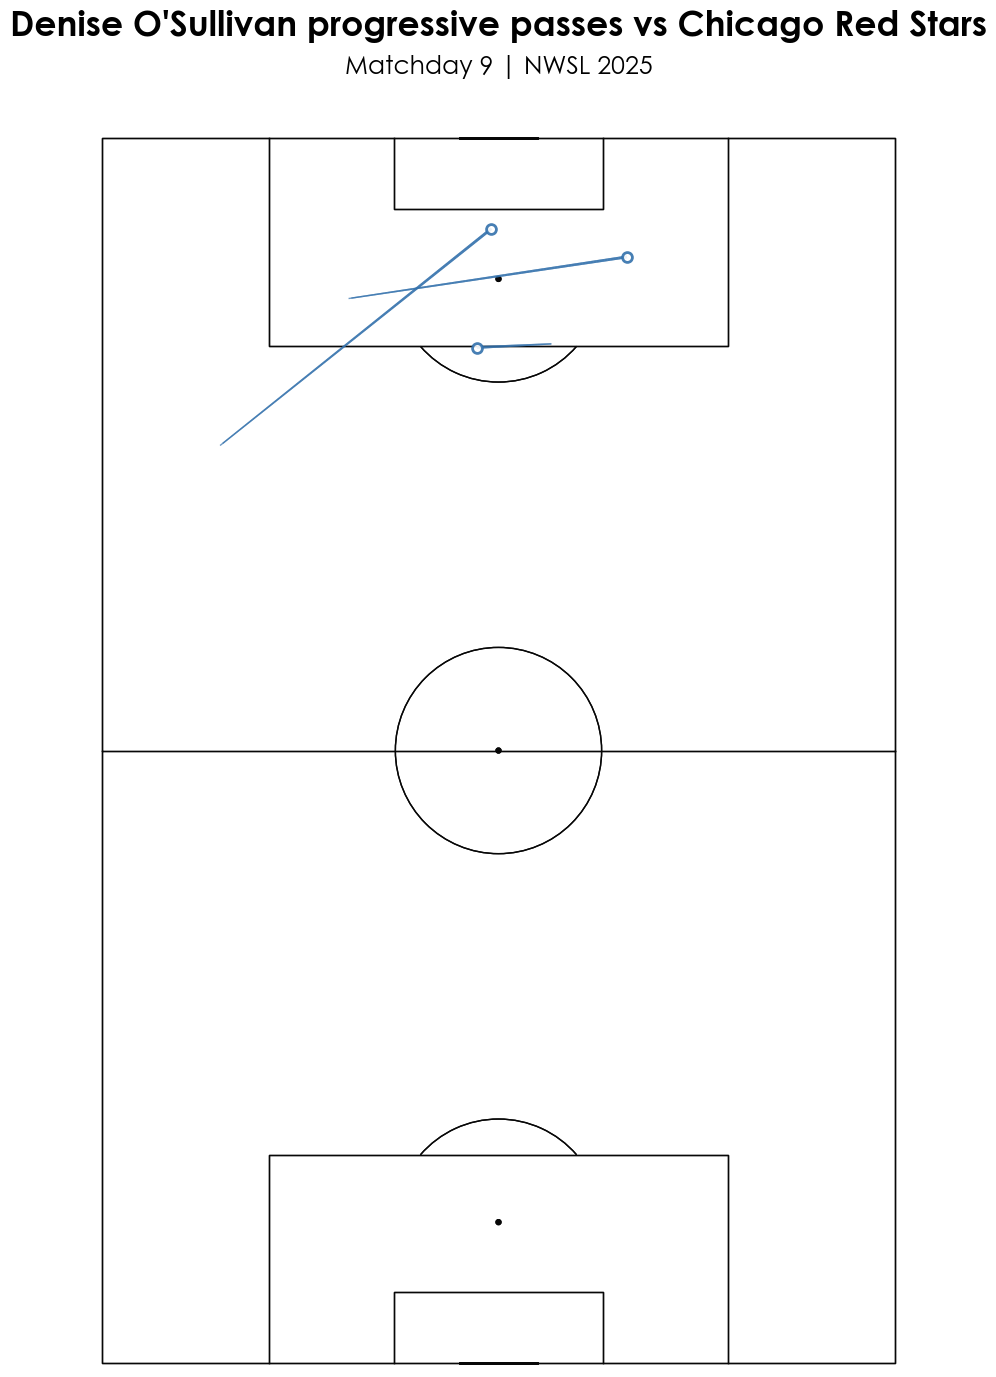

In [183]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from highlight_text import  ax_text, fig_text

pitch = VerticalPitch(pitch_type='opta', half=False, 
                     pad_top=0.1, pad_bottom=0.5, pitch_color=pitchColor, line_color=lineColor,
                     linewidth=1)
fig, ax = pitch.draw(figsize=(16,14), constrained_layout=True)
pitch.draw(ax=ax)

fig.set_facecolor(pitchColor)

# Set plot title
fig.suptitle("Denise O'Sullivan progressive passes vs Chicago Red Stars", fontsize=25, 
             fontfamily='Century Gothic', fontweight='bold')
title = fig_text(s="Matchday 9 | NWSL 2025", fontsize=18, fontfamily='Century Gothic', 
                 fontweight='regular', ha='center', x = 0.5, y = 0.948)

# get specifics for multiple types of passes
regular_pass = pass_df[(pass_df['playerName'] == 'A. Sanchez')]
key_pass = pass_df[(pass_df['playerName'] == 'A. Sanchez') & (pass_df['keyPass'].notna())]
assist = pass_df[(pass_df['playerName'] == 'A. Sanchez') & (pass_df['Assist'].notna())]
progressive_pass = pass_df[(pass_df['playerName'] == 'A. Sanchez') & (pass_df['progressive'] == True)]
final_third = pass_df[(pass_df['playerName'] == 'A. Sanchez') & (pass_df['final_third'] == True)]
# df = pass_df[(pass_df['playerName'] == 'A. Sanchez') & (pass_df['keyPass'].notna())]

# plot the passes
pitch.lines(df['x'], df['y'],
            df['passEndX'], df['passEndY'],
            ax=ax, comet=True, color=passColor, lw=2, alpha=0.7)

pitch.scatter(df['passEndX'], df['passEndY'],
              edgecolors=passColor, c=pitchColor, s=50, zorder=4,
              ax=ax, marker='o', alpha=0.9, linewidths=2)

# create a legend